In [1]:
import NCrystal as NC
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
T = 300 # temperature 

In [3]:
wavelength = np.linspace(0,25,1000)
E = NC.wl2ekin(wavelength)

In [4]:
# deuterated
GO_D_sm_nos = NC.createScatter('ncmat-graphitic/HighNESS_DeuteratedGraphiteOxide_small_model_sg1_C8O3D2.ncmat;temp={}K'.format(T))
GO_D_lg_nos = NC.createScatter('ncmat-graphitic/HighNESS_DeuteratedGraphiteOxide_large_model_sg1_C18O3D2.ncmat;temp={}K'.format(T))
GO_D_wt_nos = NC.createScatter('ncmat-graphitic/HighNESS_DeuteratedGraphiteOxideWater_sg1_C8O3D2-D2O.ncmat;temp={}K'.format(T))

xs_GO_D_sm_nos = GO_D_sm_nos.crossSectionNonOriented(E)
xs_GO_D_lg_nos = GO_D_lg_nos.crossSectionNonOriented(E)
xs_GO_D_wt_nos = GO_D_wt_nos.crossSectionNonOriented(E)

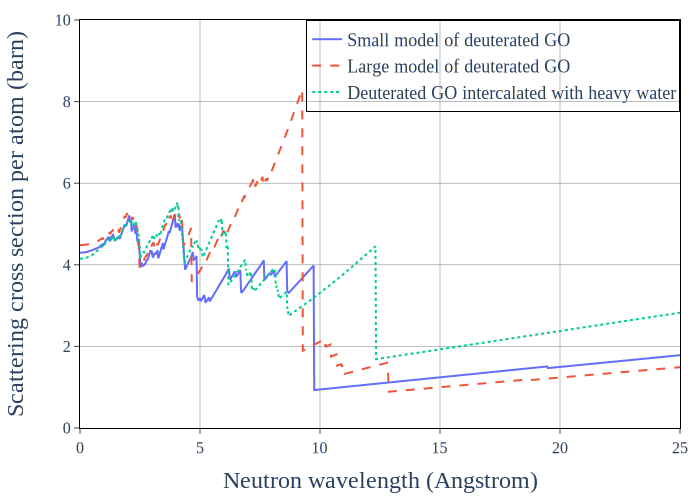

In [6]:
fig = make_subplots(rows = 1, cols = 1)
fig.add_trace(
    go.Scatter(
        x = wavelength,
        y = xs_GO_D_sm_nos,
        mode = 'lines',
        #line_dash = 'dash',
        name = 'Small model of deuterated GO',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = wavelength,
        y = xs_GO_D_lg_nos,
        mode = 'lines',
        line_dash = 'dash',
        name = 'Large model of deuterated GO',
    ),
    row = 1, col = 1
)
fig.add_trace(
    go.Scatter(
        x = wavelength,
        y = xs_GO_D_wt_nos,
        mode = 'lines',
        line_dash = 'dot',
        name = 'Deuterated GO intercalated with heavy water',
    ),
    row = 1, col = 1
)

fig.update_xaxes(tickfont = dict(size = 16), linecolor = 'black', mirror = True, 
                 ticks = 'outside', exponentformat = 'power', row = 1, col = 1, 
                 #type = 'log', 
                 title = 'Neutron wavelength (Angstrom)', 
                 showgrid=True, gridwidth=.5, gridcolor='grey')
fig.update_yaxes(tickfont = dict(size = 16), linecolor = 'black', mirror = True, 
                 ticks = 'outside', exponentformat = 'power', row = 1, col = 1, 
                 #type = 'log', 
                 range = [0,10],
                 title = 'Scattering cross section per atom (barn)',
                 showgrid=True, gridwidth=.5, gridcolor='grey')
fig.update_layout(
    paper_bgcolor = 'rgba(0,0,0,0)',
    plot_bgcolor = 'rgba(0,0,0,0)',
    font = dict(family = 'Times new roman', size = 20),
    legend = dict(x = 0.377, y = 1., bordercolor = "Black", borderwidth = 1, font = dict(size = 18)),
    margin = dict(l = 80, r = 20, t = 20, b = 60),
    autosize=False,
    width=700,
    height=500
)
fig.show('svg')